https://towardsdatascience.com/a-brief-introduction-to-pyspark-ff4284701873

https://annefou.github.io/pyspark/03-pyspark_context/

https://jaceklaskowski.gitbooks.io/mastering-apache-spark/spark-rdd.html

# Intro to Spark

We are going to do a short introduction to pyspark, the Python version of [Apache Spark](https://spark.apache.org/), which is the most famous Big Data processing framework currently.

Besides python, Spark supports [Java](https://spark.apache.org/docs/latest/api/java/index.html) (its native language), [Scala](https://spark.apache.org/docs/latest/api/scala/index.html#package) and [R](https://spark.apache.org/docs/latest/sparkr.html).

In [10]:
from IPython.display import Image

Spark works by connecting to a spark cluster, which is just a group of computers working together.

A spark cluster has the following elements:
- `Driver`: This is the computer from which we run spark code (usually our personal computer).
- `Workers`: These machines are the ones that "do the dirty work", they perform the computations. Each worker has multiple `Executors`. Each executor performs an operation at a time. For example if a worker has a CPU with 4 cores it could have 4 executors.
- `Manager`: This machine is in charge of receiving requests from the Driver and managing the workers jobs.

In [ ]:
Image("spark-cluster-overview.png")

Spark can also work on a single computer, using all of our computer cores and creating a one machine "cluster".


If we want to test the use of a distributed cluster, we can use the Community version of [DataBricks](https://community.cloud.databricks.com), the company that created Spark. The community cluster is very small and it gets deleted after an hour of inactivity.

In order to use spark we need to create a `SparkSession`

In [12]:
import findspark
findspark.init()

import pyspark

In [13]:
from pyspark.sql import SparkSession

spark = (
    SparkSession
    .builder
    .master("local")
    .getOrCreate()
)

**NOTE:** If the above line fails, you might have to install JAVA 8, which is the one supported by spark, at least until spark 3.0 is out.


For WSL/Ubuntu users you can just install it with the following command (make sure to close the notebook, install java, and restart Ubuntu):

```
sudo apt-get install openjdk-8-jdk
```

Then you need to set java 8 as the default version with 

```
sudo update-alternatives --config java
```

and selecting java-8

In [14]:
spark

once we have a spark session, we can read data from a wide variety of inputs. For example, we can read from the taxi 2014 small parquet dataset

In [ ]:
taxi = (
    spark
    .read
    .load("./data/nyc_taxi_data_2014_small.parquet/")
)

In [6]:
taxi

DataFrame[vendor_id: string, pickup_datetime: string, dropoff_datetime: string, passenger_count: bigint, trip_distance: double, pickup_longitude: double, pickup_latitude: double, rate_code: bigint, store_and_fwd_flag: string, dropoff_longitude: double, dropoff_latitude: double, payment_type: string, fare_amount: double, surcharge: double, mta_tax: double, tip_amount: double, tolls_amount: double, total_amount: double]

In [7]:
type(taxi)

pyspark.sql.dataframe.DataFrame

We can see the columns as usual

In [8]:
taxi.columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

We can see the dataframe datatypes with `printSchema()`

In [9]:
taxi.printSchema()

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- rate_code: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- surcharge: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



We can also read spark dataframes from csv files

In [10]:
taxi_csv = spark.read.csv("./data/nyc_taxi_data_2014_small.csv", header=True)

However, since csv files have no data types, spark assumes every column is a string by default.

In [11]:
taxi_csv.printSchema()

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- rate_code: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- surcharge: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- total_amount: string (nullable = true)



We can force spark to read a csv and infer (guess) its schema (note, this takes about 3 min in my computer)

In [11]:
# taxi_csv = spark.read.csv("./data/nyc_taxi_data_2014_big.csv", header=True, inferSchema=True)
# taxi_csv.printSchema()

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- rate_code: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- surcharge: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



We can see the first rows with `show()`

In [13]:
taxi.show(5)

+---------+-------------------+-------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+------------------+------------+-----------+---------+-------+----------+------------+------------+
|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|rate_code|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|surcharge|mta_tax|tip_amount|tolls_amount|total_amount|
+---------+-------------------+-------------------+---------------+-------------+------------------+------------------+---------+------------------+------------------+------------------+------------+-----------+---------+-------+----------+------------+------------+
|      CMT|2014-01-09 20:45:25|2014-01-09 20:52:31|              1|          0.7|-73.99476999999999|         40.736828|        1|                 N|-73.98222699999998|40.731790000000004|         CRD|

Spark's `show` function is a bit ugly, we can create a better function:

In [14]:
import pandas as pd

def show(df, n=10):
    display(pd.DataFrame(df.head(n), columns=df.columns))

In [15]:
show(taxi)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75
5,CMT,2014-01-09 20:45:07,2014-01-09 20:51:01,1,0.9,-73.983811,40.749655,1,N,-73.989747,40.756575,CRD,6.0,0.5,0.5,1.40,0.0,8.40
6,CMT,2014-01-09 20:44:04,2014-01-09 21:05:45,1,3.6,-73.984138,40.726317,1,N,-73.962869,40.758443,CRD,16.5,0.5,0.5,5.25,0.0,22.75
7,CMT,2014-01-09 20:43:23,2014-01-09 20:52:07,1,2.1,-73.979906,40.745850,1,N,-73.959090,40.773639,CRD,9.0,0.5,0.5,2.00,0.0,12.00
8,CMT,2014-01-09 20:43:04,2014-01-09 20:54:29,1,3.4,-73.981147,40.758918,1,N,-73.942510,40.785975,CRD,12.0,0.5,0.5,2.60,0.0,15.60
9,CMT,2014-01-09 20:50:23,2014-01-09 20:58:10,1,2.3,-73.955193,40.765468,1,N,-73.979023,40.740578,CRD,9.0,0.5,0.5,1.00,0.0,11.00


We can write the dataframe to disk in multiple formats (this takes some time)

In [16]:
# parquet
# df.write.save('./data/nyc_taxi_data_2014_big.parquet/', format='parquet')

# json lines
# df.write.json('./data/nyc_taxi_data_2014_small.json/')

# csv, without headers
# df.write.csv('./data/nyc_taxi_data_2014_small.csv/')

## Resilient Distributed Datasets (RDD)

Spark revolves around the concept of a [resilient distributed dataset (RDD)](https://databricks.com/glossary/what-is-rdd), which is a fault-tolerant collection of elements that can be operated on in parallel. 

**Resilient**, i.e. fault-tolerant with the help of RDD lineage graph and so able to recompute missing or damaged partitions due to node failures.

**Distributed** with data residing on multiple nodes in a cluster.

**Dataset** is a collection of partitioned data with primitive values or values of values, e.g. tuples or other objects (that represent records of the data you work with).

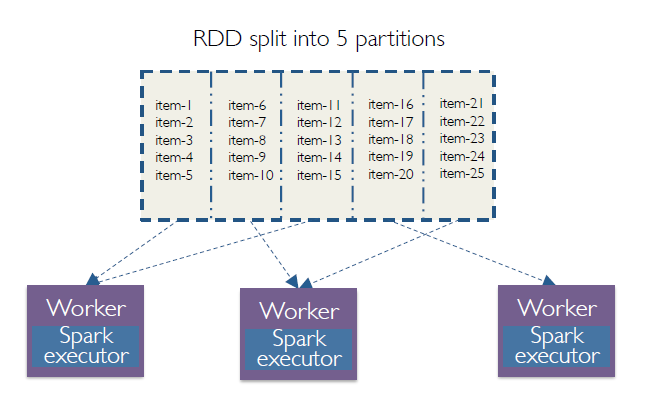

In [17]:
Image("spark_rdd.png")

In [18]:
taxi.rdd

MapPartitionsRDD[31] at javaToPython at NativeMethodAccessorImpl.java:0

## Operations with spark dataframes

Spark's is lazy similarly to dask. However spark syntax is different from dask (makes sense since Spark is java based), there is no compute method, but there is `collect()` that does the same. 

Sometimes is not even necessary. For example to see the number of rows in the dataset we just do `.count()`

In [19]:
taxi.count()

1000000

In [20]:
taxi.columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

Let's rename the column `store_and_fwd_flag`:

In [21]:
taxi = taxi.withColumnRenamed("store_and_fwd_flag", "offline_transaction")

In [22]:
taxi.columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'offline_transaction',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

We can filter spark dataframes, it is important to note that Spark dataframes do not support slicing (the syntax when we do `df["column"]`).

In [23]:
taxi_with_tip = taxi.where(taxi.tip_amount > 0)

taxi_with_tip

DataFrame[vendor_id: string, pickup_datetime: string, dropoff_datetime: string, passenger_count: bigint, trip_distance: double, pickup_longitude: double, pickup_latitude: double, rate_code: bigint, offline_transaction: string, dropoff_longitude: double, dropoff_latitude: double, payment_type: string, fare_amount: double, surcharge: double, mta_tax: double, tip_amount: double, tolls_amount: double, total_amount: double]

because the output of this computation is a dataframe, we need to calculate it. When the output of a computation is small (it fits in memory), we can do `collect()` to get the output (and force the lazy computation)

In [24]:
taxi_with_tip.select("tip_amount").describe().collect()

[Row(summary='count', tip_amount='436019'),
 Row(summary='mean', tip_amount='2.4788648430456823'),
 Row(summary='stddev', tip_amount='2.3059007723919467'),
 Row(summary='min', tip_amount='0.01'),
 Row(summary='max', tip_amount='125.0')]

the output of `collect()` is pretty ugly. Basically, spark dataframes are a list of [Rows], when we do collect we get the rows back.

It is usually nicer to get a pandas dataframe as an output of a computation:

In [25]:
taxi_with_tip.select("tip_amount").describe().toPandas()

,summary,tip_amount
0,count,436019
1,mean,2.4788648430456823
2,stddev,2.3059007723919467
3,min,0.01
4,max,125.0


Let's calculate the same statistics we have calculated so far:

In [26]:
trips_per_payment_type = taxi.groupby("payment_type").count().toPandas()
trips_per_payment_type

,payment_type,count
0,CSH,545819
1,DIS,1719
2,CRD,446446
3,UNK,1
4,NOC,6015


In [27]:
average_tip_per_payment = taxi.groupby("payment_type").mean("tip_amount").toPandas()
average_tip_per_payment

,payment_type,avg(tip_amount)
0,CSH,0.000782
1,DIS,0.011163
2,CRD,2.419945
3,UNK,1.260000
4,NOC,0.001663


## Spark SQL

We can execute sql to work with spark dataframes

To do so we have to register `views`, that are like temporary sql tables.

In [28]:
taxi.createOrReplaceTempView("trips")

Once we have a table registered we can run sql on it (using `spark.sql` module)

In [29]:
mean_tip_per_payment_type = spark.sql("""
  SELECT mean(tip_amount) as mean_tip, vendor_id
  FROM trips
  GROUP BY vendor_id
  ORDER BY mean_tip desc
  LIMIT 5
""")

mean_tip_per_payment_type

DataFrame[mean_tip: double, vendor_id: string]

In [30]:
show(mean_tip_per_payment_type)

,mean_tip,vendor_id
0,1.690290,VTS
1,1.080748,CMT
